In [514]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsbombpy import sb
import seaborn as sn
from mplsoccer.pitch import Pitch

In [524]:
matches = sb.matches(competition_id = 43, season_id = 3)

In [516]:
df1 = sb.events(match_id = 8656)

In [517]:
df1 = df1[['team', 'type', 'minute', 'location', 'pass_end_location', 'player', 'pass_outcome']].reset_index()
df1 = df1[df1['player'] == 'Luka Modrić'].reset_index()

In [519]:
df1['pass_outcome'] = df1['pass_outcome'].fillna('Complete')
df1['pass_end_location'] = df1['pass_end_location'].fillna('No_Pass')
df1.drop(df1[df1['pass_end_location'] == 'No_Pass'].index, inplace=True)

In [520]:
df2 = df1['location'].apply(pd.Series)
df3 = df1['pass_end_location'].apply(pd.Series)

df2.columns = ['x','y']
df3.columns = ['endx','endy']

In [521]:
df = pd.concat([df1, df2, df3], axis=1, join='inner')
df.head()

,level_0,index,team,type,minute,location,pass_end_location,player,pass_outcome,x,y,endx,endy
0,40,40,Croatia,Pass,5,"[60.0, 56.0]","[68.0, 79.0]",Luka Modrić,Out,60.0,56.0,68.0,79.0
1,46,46,Croatia,Pass,6,"[68.0, 74.0]","[96.0, 57.0]",Luka Modrić,Complete,68.0,74.0,96.0,57.0
2,57,57,Croatia,Pass,7,"[58.0, 52.0]","[59.0, 5.0]",Luka Modrić,Complete,58.0,52.0,59.0,5.0
3,61,61,Croatia,Pass,7,"[63.0, 53.0]","[77.0, 80.0]",Luka Modrić,Complete,63.0,53.0,77.0,80.0
4,71,71,Croatia,Pass,8,"[119.0, 79.0]","[114.0, 34.0]",Luka Modrić,Incomplete,119.0,79.0,114.0,34.0


In [522]:
df['x'] = df['x']*1.2
df['y'] = df['y']*0.8

df['endx'] = df['endx']*1.2
df['endy'] = df['endy']*0.8

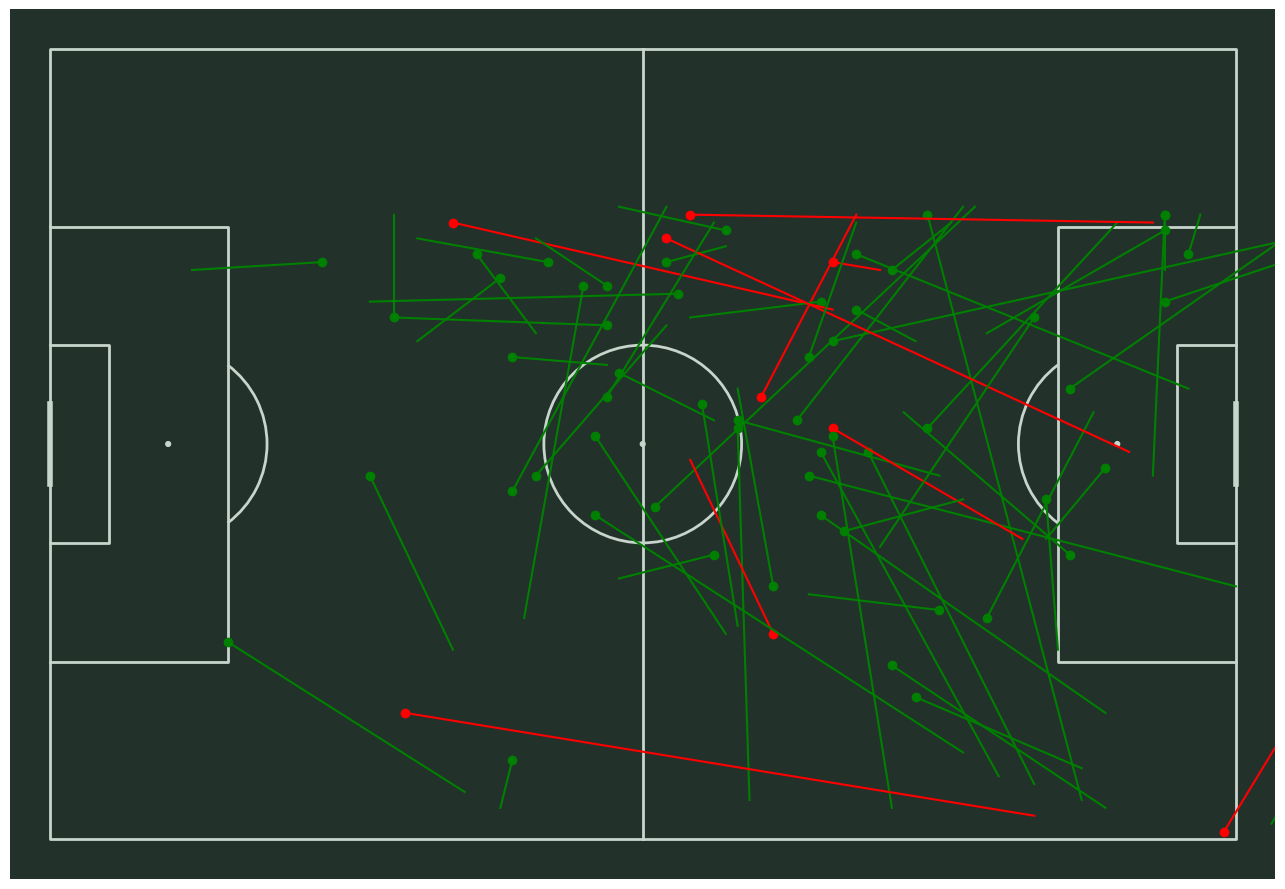

In [523]:
pitch = Pitch(pitch_type = 'statsbomb', pitch_color='#23312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize = (16,9))

plt.gca().invert_yaxis()

for x in range(len(df['x'])):
    if df['pass_outcome'][x] == "Complete":
        plt.plot((df['x'][x], df['endx'][x]),(df['y'][x], df['endy'][x]), color = 'green')
        plt.scatter(df['x'][x], df['y'][x], color = 'green')
    else:
        plt.plot((df['x'][x], df['endx'][x]),(df['y'][x], df['endy'][x]), color = 'red')
        plt.scatter(df['x'][x], df['y'][x], color = 'red')

